In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

In [2]:
df=pd.read_csv('movies.csv')

In [3]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

  release_date                       released  score      votes  \
0  13-Jun-1980  June 13, 1980 (United States)    8.4   927000.0   
1   2-Jul-1980   July 2, 1980 (United States)    5.8    65000.0   
2  20-Jun-1980  June 20, 1980 (United States)    8.7  1200000.0   
3   2-Jul-1980   July 2, 1980 (United States)    7.7   221000.0   
4  25-Jul-1980  July 25, 1980 (United States)    7.3   108000.0   

          director                   writer            star         country  \
0  Stanley Kubrick             Stephen King  Jack Nicholson  United Kingdom   
1   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   United States   
2   Irvin Kershner           Leigh Brackett     Mark Hamill   United States   
3     Jim Abrahams             Jim Abrahams     Robert Hays   United States   
4     Harold Ramis       Brian Doyle-Murray     Chevy Chase   United States   

       budget        gross             company  runtime  
0  19000000.0   46998772.0        Warner Bros.    146.0  
1   4500000.0   58853106.0   Columbia Pictures    104.0  
2  18000000.0  538375067.0           Lucasfilm    124.0  
3   3500000.0   83453539.0  Paramount Pictures     88.0  
4   6000000.0   39846344.0      Orion Pictures     98.0

In [4]:
df.tail()

name rating   genre  year release_date  \
7663   More to Life    NaN   Drama  2020  23-Oct-2020   
7664    Dream Round    NaN  Comedy  2020   7-Feb-2020   
7665  Saving Mbango    NaN   Drama  2020  27-Apr-2020   
7666   It's Just Us    NaN   Drama  2020   1-Oct-2020   
7667      Tee em el    NaN  Horror  2020  19-Aug-2020   

                              released  score  votes       director  \
7663  October 23, 2020 (United States)    3.1   18.0  Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7   36.0   Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7   29.0   Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN    NaN  James Randall   
7667   August 19, 2020 (United States)    5.7    7.0   Pereko Mosia   

             writer              star        country   budget  gross  \
7663  Joseph Ebanks      Shannon Bond  United States   7000.0    NaN   
7664    Lisa Huston  Michael Saquella  United States      NaN    NaN   
7665   Lynno Lovert      Onyama Laura  United States  58750.0    NaN   
7666  James Randall     Christina Roz  United States  15000.0    NaN   
7667   Pereko Mosia  Siyabonga Mabaso   South Africa      NaN    NaN   

                        company  runtime  
7663                        NaN     90.0  
7664  Cactus Blue Entertainment     90.0  
7665           Embi Productions      NaN  
7666                        NaN    120.0  
7667                PK 65 Films    102.0

In [5]:
df.shape

(7668, 16)

In [6]:
# Columns List:
df.columns.to_list()

['name',
 'rating',
 'genre',
 'year',
 'release_date',
 'released',
 'score',
 'votes',
 'director',
 'writer',
 'star',
 'country',
 'budget',
 'gross',
 'company',
 'runtime']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          7668 non-null   object 
 1   rating        7591 non-null   object 
 2   genre         7668 non-null   object 
 3   year          7668 non-null   int64  
 4   release_date  7668 non-null   object 
 5   released      7668 non-null   object 
 6   score         7665 non-null   float64
 7   votes         7665 non-null   float64
 8   director      7668 non-null   object 
 9   writer        7665 non-null   object 
 10  star          7667 non-null   object 
 11  country       7665 non-null   object 
 12  budget        5497 non-null   float64
 13  gross         7479 non-null   float64
 14  company       7651 non-null   object 
 15  runtime       7664 non-null   float64
dtypes: float64(5), int64(1), object(10)
memory usage: 958.6+ KB


In [8]:
# Column Data_Types
df.dtypes

name             object
rating           object
genre            object
year              int64
release_date     object
released         object
score           float64
votes           float64
director         object
writer           object
star             object
country          object
budget          float64
gross           float64
company          object
runtime         float64
dtype: object

### Null Values

In [9]:
df.duplicated().sum()

0

In [10]:
# Find Missing Data
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,round(pct_missing*100)))

name-0%
rating-1%
genre-0%
year-0%
release_date-0%
released-0%
score-0%
votes-0%
director-0%
writer-0%
star-0%
country-0%
budget-28%
gross-2%
company-0%
runtime-0%


In [11]:
# Number of null data
df.isnull().sum()

name               0
rating            77
genre              0
year               0
release_date       0
released           0
score              3
votes              3
director           0
writer             3
star               1
country            3
budget          2171
gross            189
company           17
runtime            4
dtype: int64

In [12]:
# Total Number of null Data
df.isnull().sum().sum()

2471

In [13]:
df['rating'].fillna('Unknown',inplace=True)
df['score'].fillna(0,inplace=True)
df['votes'].fillna(0,inplace=True)
df['writer'].fillna('Unknown',inplace=True)
df['star'].fillna('Unknown',inplace=True)
df['country'].fillna('Unknown',inplace=True)
df['budget'].fillna(0,inplace=True)
df['gross'].fillna(0,inplace=True)
df['company'].fillna('Unknown',inplace=True)
df['runtime'].fillna(0,inplace=True)

In [ ]:
# other Option
# df.fillna({'rating':'Unknown', 'released': 'Unknown', ......}, inplace=True)

In [14]:
# Total Number of null Data
df.isnull().sum().sum()

0

In [15]:
# Find Missing Data
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,round(pct_missing*100)))

name-0%
rating-0%
genre-0%
year-0%
release_date-0%
released-0%
score-0%
votes-0%
director-0%
writer-0%
star-0%
country-0%
budget-0%
gross-0%
company-0%
runtime-0%


### Column change Data Types

In [16]:
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')
df['votes']=df['votes'].astype('int64')
df['runtime']=df['runtime'].astype('int64')

In [20]:
#df['budget']=df['budget'].astype('int64')

In [21]:
#df['gross']=df['gross'].astype('int64')

In [ ]:
#df['votes']=df['votes'].astype('int64')

In [17]:
df['Countries']=df['released'].astype(str)

In [18]:
df.dtypes

name             object
rating           object
genre            object
year              int64
release_date     object
released         object
score           float64
votes             int64
director         object
writer           object
star             object
country          object
budget            int64
gross             int64
company          object
runtime           int64
Countries        object
dtype: object

In [28]:
# Correct Values
#df['Year correct']=df['released'].astype(str).str[9:13]

In [179]:
#df['05']=df['Countries'].str.split(', ',expand=False)

In [181]:
#df.drop(['05'],axis=1,inplace=True)

In [175]:
#df['01']=df['Countries'].str.split('\(|\)', expand=False)

In [19]:
df['Countries']

0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: Countries, Length: 7668, dtype: object

In [20]:
df[['date','03']]=df['Countries'].str.split(', ',expand=True)

In [21]:
df[['date','03']]

date                    03
0        June 13  1980 (United States)
1         July 2  1980 (United States)
2        June 20  1980 (United States)
3         July 2  1980 (United States)
4        July 25  1980 (United States)
...          ...                   ...
7663  October 23  2020 (United States)
7664  February 7  2020 (United States)
7665    April 27       2020 (Cameroon)
7666   October 1  2020 (United States)
7667   August 19  2020 (United States)

[7668 rows x 2 columns]

In [22]:
df['03']

0       1980 (United States)
1       1980 (United States)
2       1980 (United States)
3       1980 (United States)
4       1980 (United States)
                ...         
7663    2020 (United States)
7664    2020 (United States)
7665         2020 (Cameroon)
7666    2020 (United States)
7667    2020 (United States)
Name: 03, Length: 7668, dtype: object

In [23]:
df['03'].str.split('\(|\)', expand=True)

0              1 2 
0     1980   United States   
1     1980   United States   
2     1980   United States   
3     1980   United States   
4     1980   United States   
...     ...            ... ..
7663  2020   United States   
7664  2020   United States   
7665  2020        Cameroon   
7666  2020   United States   
7667  2020   United States   

[7668 rows x 3 columns]

In [24]:
df[['yearsp','coun','07']]=df['03'].str.split('\(|\)', expand=True)

In [25]:
df[['yearsp','coun','07']]

yearsp           coun 07
0     1980   United States   
1     1980   United States   
2     1980   United States   
3     1980   United States   
4     1980   United States   
...     ...            ... ..
7663  2020   United States   
7664  2020   United States   
7665  2020        Cameroon   
7666  2020   United States   
7667  2020   United States   

[7668 rows x 3 columns]

In [ ]:
#df=df.iloc[:,[0,2,1]]

In [26]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

  release_date                       released  score    votes  \
0  13-Jun-1980  June 13, 1980 (United States)    8.4   927000   
1   2-Jul-1980   July 2, 1980 (United States)    5.8    65000   
2  20-Jun-1980  June 20, 1980 (United States)    8.7  1200000   
3   2-Jul-1980   July 2, 1980 (United States)    7.7   221000   
4  25-Jul-1980  July 25, 1980 (United States)    7.3   108000   

          director                   writer  ...    budget      gross  \
0  Stanley Kubrick             Stephen King  ...  19000000   46998772   
1   Randal Kleiser  Henry De Vere Stacpoole  ...   4500000   58853106   
2   Irvin Kershner           Leigh Brackett  ...  18000000  538375067   
3     Jim Abrahams             Jim Abrahams  ...   3500000   83453539   
4     Harold Ramis       Brian Doyle-Murray  ...   6000000   39846344   

              company  runtime                      Countries     date  \
0        Warner Bros.      146  June 13, 1980 (United States)  June 13   
1   Columbia Pictures      104   July 2, 1980 (United States)   July 2   
2           Lucasfilm      124  June 20, 1980 (United States)  June 20   
3  Paramount Pictures       88   July 2, 1980 (United States)   July 2   
4      Orion Pictures       98  July 25, 1980 (United States)  July 25   

                     03 yearsp           coun 07  
0  1980 (United States)  1980   United States     
1  1980 (United States)  1980   United States     
2  1980 (United States)  1980   United States     
3  1980 (United States)  1980   United States     
4  1980 (United States)  1980   United States     

[5 rows x 22 columns]

In [27]:
df.rename(columns={'03':'total', '07':'empty'},inplace=True)

In [28]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

  release_date                       released  score    votes  \
0  13-Jun-1980  June 13, 1980 (United States)    8.4   927000   
1   2-Jul-1980   July 2, 1980 (United States)    5.8    65000   
2  20-Jun-1980  June 20, 1980 (United States)    8.7  1200000   
3   2-Jul-1980   July 2, 1980 (United States)    7.7   221000   
4  25-Jul-1980  July 25, 1980 (United States)    7.3   108000   

          director                   writer  ...    budget      gross  \
0  Stanley Kubrick             Stephen King  ...  19000000   46998772   
1   Randal Kleiser  Henry De Vere Stacpoole  ...   4500000   58853106   
2   Irvin Kershner           Leigh Brackett  ...  18000000  538375067   
3     Jim Abrahams             Jim Abrahams  ...   3500000   83453539   
4     Harold Ramis       Brian Doyle-Murray  ...   6000000   39846344   

              company  runtime                      Countries     date  \
0        Warner Bros.      146  June 13, 1980 (United States)  June 13   
1   Columbia Pictures      104   July 2, 1980 (United States)   July 2   
2           Lucasfilm      124  June 20, 1980 (United States)  June 20   
3  Paramount Pictures       88   July 2, 1980 (United States)   July 2   
4      Orion Pictures       98  July 25, 1980 (United States)  July 25   

                  total yearsp           coun empty  
0  1980 (United States)  1980   United States        
1  1980 (United States)  1980   United States        
2  1980 (United States)  1980   United States        
3  1980 (United States)  1980   United States        
4  1980 (United States)  1980   United States        

[5 rows x 22 columns]

In [30]:
df.drop(df[['released', 'Countries', 'date', 'total', 'empty']], axis=1, inplace=True)

In [32]:
#df.drop(columns={'empty','date'})

In [36]:
df.drop(columns={'year'},inplace=True)

In [37]:
df.head()

name rating      genre  \
0                                     The Shining      R      Drama   
1                                 The Blue Lagoon      R  Adventure   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action   
3                                       Airplane!     PG     Comedy   
4                                      Caddyshack      R     Comedy   

  release_date  score    votes         director                   writer  \
0  13-Jun-1980    8.4   927000  Stanley Kubrick             Stephen King   
1   2-Jul-1980    5.8    65000   Randal Kleiser  Henry De Vere Stacpoole   
2  20-Jun-1980    8.7  1200000   Irvin Kershner           Leigh Brackett   
3   2-Jul-1980    7.7   221000     Jim Abrahams             Jim Abrahams   
4  25-Jul-1980    7.3   108000     Harold Ramis       Brian Doyle-Murray   

             star         country    budget      gross             company  \
0  Jack Nicholson  United Kingdom  19000000   46998772        Warner Bros.   
1  Brooke Shields   United States   4500000   58853106   Columbia Pictures   
2     Mark Hamill   United States  18000000  538375067           Lucasfilm   
3     Robert Hays   United States   3500000   83453539  Paramount Pictures   
4     Chevy Chase   United States   6000000   39846344      Orion Pictures   

   runtime yearsp           coun  
0      146  1980   United States  
1      104  1980   United States  
2      124  1980   United States  
3       88  1980   United States  
4       98  1980   United States

In [38]:
df.rename(columns={'yearsp':'year', 'coun':'country'},inplace=True)

In [39]:
df.head()

name rating      genre  \
0                                     The Shining      R      Drama   
1                                 The Blue Lagoon      R  Adventure   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action   
3                                       Airplane!     PG     Comedy   
4                                      Caddyshack      R     Comedy   

  release_date  score    votes         director                   writer  \
0  13-Jun-1980    8.4   927000  Stanley Kubrick             Stephen King   
1   2-Jul-1980    5.8    65000   Randal Kleiser  Henry De Vere Stacpoole   
2  20-Jun-1980    8.7  1200000   Irvin Kershner           Leigh Brackett   
3   2-Jul-1980    7.7   221000     Jim Abrahams             Jim Abrahams   
4  25-Jul-1980    7.3   108000     Harold Ramis       Brian Doyle-Murray   

             star         country    budget      gross             company  \
0  Jack Nicholson  United Kingdom  19000000   46998772        Warner Bros.   
1  Brooke Shields   United States   4500000   58853106   Columbia Pictures   
2     Mark Hamill   United States  18000000  538375067           Lucasfilm   
3     Robert Hays   United States   3500000   83453539  Paramount Pictures   
4     Chevy Chase   United States   6000000   39846344      Orion Pictures   

   runtime   year        country  
0      146  1980   United States  
1      104  1980   United States  
2      124  1980   United States  
3       88  1980   United States  
4       98  1980   United States

In [42]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

In [41]:
pd.set_option('display.max_rows', None)

In [ ]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

### Data Visualization

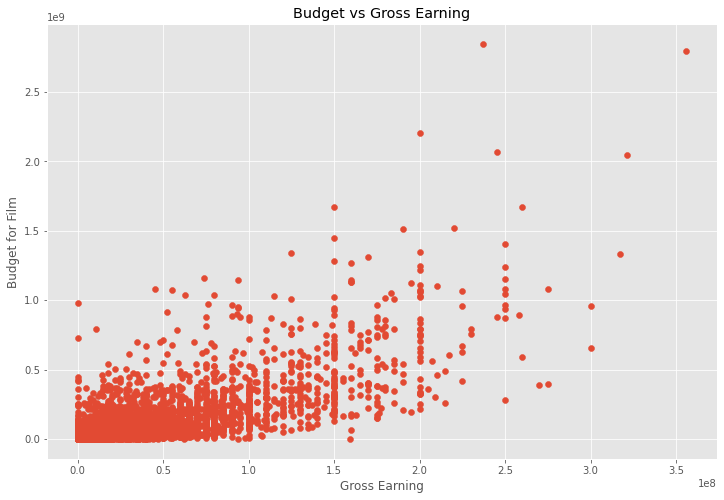

In [45]:
# Scatter Plots
# budget vs gross

plt.scatter(x='budget', y='gross', data=df)
plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earning')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

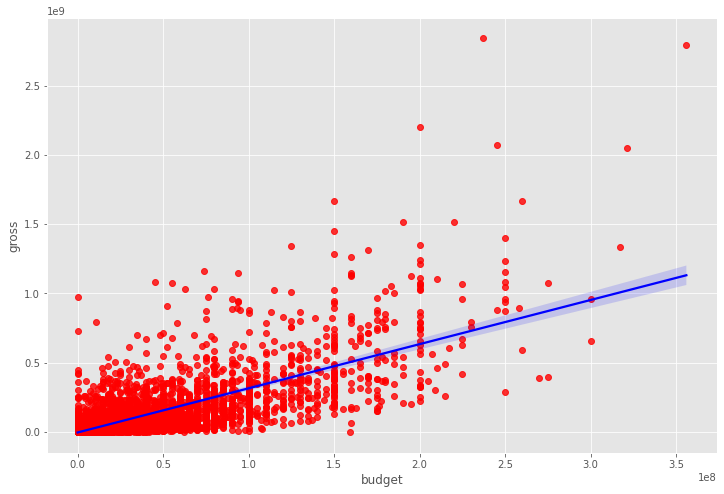

In [47]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [48]:
# Correleation
df.corr()

score     votes    budget     gross   runtime
score    1.000000  0.407101  0.056863  0.186012  0.394564
votes    0.407101  1.000000  0.486931  0.632870  0.306984
budget   0.056863  0.486931  1.000000  0.750157  0.268372
gross    0.186012  0.632870  0.750157  1.000000  0.244339
runtime  0.394564  0.306984  0.268372  0.244339  1.000000

In [53]:
df.corr(method='pearson') # pearson  kendall spearman 

score     votes    budget     gross   runtime
score    1.000000  0.407101  0.056863  0.186012  0.394564
votes    0.407101  1.000000  0.486931  0.632870  0.306984
budget   0.056863  0.486931  1.000000  0.750157  0.268372
gross    0.186012  0.632870  0.750157  1.000000  0.244339
runtime  0.394564  0.306984  0.268372  0.244339  1.000000

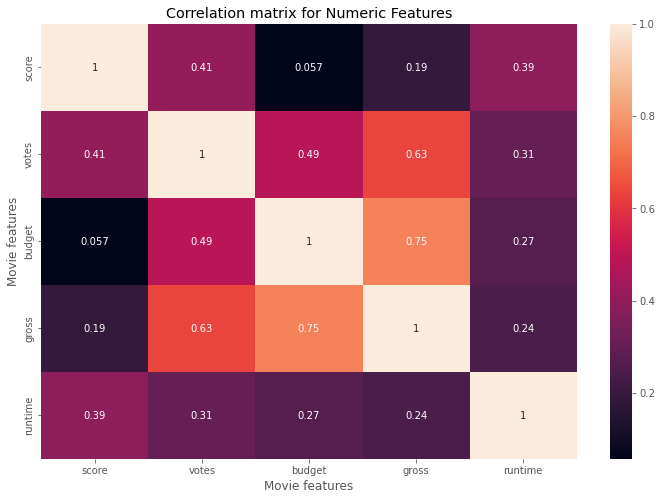

In [54]:
# high correleation btw budget and gross

corr_matrix=df.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [57]:
#df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

name    rating     genre  release_date     score     votes  \
name          1.000000  0.154269  0.036367      0.961069 -0.042806  0.290143   
rating        0.154269  1.000000 -0.091898      0.159630  0.011934  0.103921   
genre         0.036367 -0.091898  1.000000      0.036880 -0.004334  0.021797   
release_date  0.961069  0.159630  0.036880      1.000000 -0.041300  0.304847   
score        -0.042806  0.011934 -0.004334     -0.041300  1.000000 -0.005335   
votes         0.290143  0.103921  0.021797      0.304847 -0.005335  1.000000   
director      0.745905  0.098462  0.047288      0.769963 -0.020344  0.193607   
writer        0.805801  0.115812  0.033933      0.822185 -0.030743  0.226874   
star          0.731509  0.107458  0.038918      0.754982 -0.005082  0.182897   
country       0.144960  0.020296 -0.015182      0.148173  0.022484 -0.046373   
budget        0.275691  0.186280  0.069445      0.288904 -0.009946  0.395999   
gross         0.947540  0.161545  0.038635      0.976262 -0.050456  0.283068   
company       0.591834 -0.011014  0.009203      0.603873 -0.027604  0.009550   
runtime       0.052214  0.037071  0.000442      0.051347  0.029090  0.109088   
year          0.823286  0.142782  0.028172      0.849610 -0.036822  0.279376   
country       0.156995 -0.050832 -0.054399      0.162093 -0.023032 -0.090070   

              director    writer      star   country    budget     gross  \
name          0.745905  0.805801  0.731509  0.144960  0.275691  0.947540   
rating        0.098462  0.115812  0.107458  0.020296  0.186280  0.161545   
genre         0.047288  0.033933  0.038918 -0.015182  0.069445  0.038635   
release_date  0.769963  0.822185  0.754982  0.148173  0.288904  0.976262   
score        -0.020344 -0.030743 -0.005082  0.022484 -0.009946 -0.050456   
votes         0.193607  0.226874  0.182897 -0.046373  0.395999  0.283068   
director      1.000000  0.748875  0.682358  0.157134  0.108033  0.751149   
writer        0.748875  1.000000  0.676284  0.158919  0.186522  0.806367   
star          0.682358  0.676284  1.000000  0.184619  0.110894  0.735844   
country       0.157134  0.158919  0.184619  1.000000 -0.069766  0.132285   
budget        0.108033  0.186522  0.110894 -0.069766  1.000000  0.282633   
gross         0.751149  0.806367  0.735844  0.132285  0.282633  1.000000   
company       0.552420  0.547126  0.527363  0.225759 -0.087490  0.587945   
runtime      -0.007714  0.035239  0.039668  0.129405  0.117302  0.039992   
year          0.642287  0.707990  0.638648  0.110747  0.283482  0.833632   
country       0.191453  0.181251  0.185972  0.273852 -0.108693  0.149156   

               company   runtime      year   country  
name          0.591834  0.052214  0.823286  0.156995  
rating       -0.011014  0.037071  0.142782 -0.050832  
genre         0.009203  0.000442  0.028172 -0.054399  
release_date  0.603873  0.051347  0.849610  0.162093  
score        -0.027604  0.029090 -0.036822 -0.023032  
votes         0.009550  0.109088  0.279376 -0.090070  
director      0.552420 -0.007714  0.642287  0.191453  
writer        0.547126  0.035239  0.707990  0.181251  
star          0.527363  0.039668  0.638648  0.185972  
country       0.225759  0.129405  0.110747  0.273852  
budget       -0.087490  0.117302  0.283482 -0.108693  
gross         0.587945  0.039992  0.833632  0.149156  
company       1.000000  0.006195  0.492135  0.250791  
runtime       0.006195  1.000000  0.048913  0.038555  
year          0.492135  0.048913  1.000000  0.146970  
country       0.250791  0.038555  0.146970  1.000000

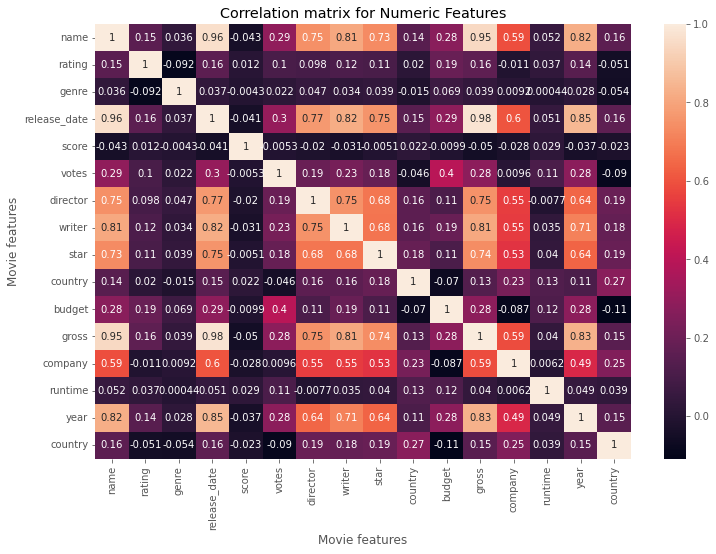

In [58]:
corr_matrix=df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [59]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 
CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='gross'>

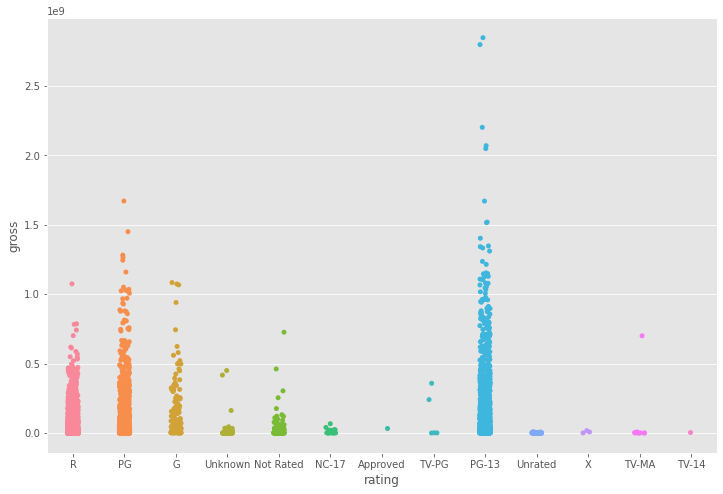

In [62]:
sns.stripplot(x="rating", y="gross", data=df)